<table>
 <tr align=left><td><img align=left src="./images/CC-BY.png">
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license. (c) Kyle T. Mandli</td>
</table>

Note:  This material largely follows the text "Numerical Linear Algebra" by Trefethen and Bau (SIAM, 1997) and is meant as a guide and supplement to the material presented there.

In [1]:
from __future__ import print_function

%matplotlib inline
import numpy
import matplotlib.pyplot as plt
import warnings

# Eigenproblems

## Overview

We will now consider eigenproblems of the form

$$
    A \mathbf{x} = \lambda \mathbf{x}
$$

where $A \in \mathbb C^{m \times m}$, $\mathbf{x} \in \mathbb C^m$ and $\lambda \in \mathbb C$.  The vector $\mathbf{x}$ is known as the **eigenvector** and $\lambda$ the **eigenvalue**.  The set of all eigenvalues is called the **spectrum** of $A$.

### The basics

The eigenproblem
$$
    A \mathbf{x} = \lambda \mathbf{x}
$$
can be rewritten as

$$
    ( A - \lambda I)\mathbf{x} = \mathbf{0}
$$

which implies that the eigenvectors are in the Null space of $A-\lambda I$. 

However for this matrix to have a non-trivial Null space, requires that $A-\lambda I$ is singular.

### Characteristic Polynomial

If $A-\lambda I$ is singular, it follows that

$$
    \det( A - \lambda I) = {\cal P}_A(\lambda) = 0
$$

where ${\cal P}_A(\lambda)$ can be shown to be a $m$th order polynomial in $\lambda$ known as  the **characteristic polynomial** of a matrix $A$



We can then state the following theorem regarding the zeros of $\mathcal{P}_A$ and the eigenvalues of $A$:

*Theorem:* $\lambda$ is an eigenvalue of $A$ if and only if $\mathcal{P}_A(\lambda) = 0$.

i.e. the eigenvalues are the roots  of ${\cal P}_A(\lambda)$, and therefore there are exactly $m$ eigenvalues.

Note: 
- Polynomial of order $m$ has $m$ roots

*Proof:* 

$$\begin{aligned}
    \text{If } \lambda \text{ is an eigenvalue of } A &\Leftrightarrow \text{ there is a non-zero vector } x \text{ s.t. } \lambda x - A x = 0 \\
    &\Leftrightarrow \lambda I A \text{ is singular (since }x\text{ is a non-trivial vector in the null space of } \lambda I - A) \\
    &\Leftrightarrow \det(\lambda I - A) = 0
\end{aligned}$$

Note that this theorem implies that even though $A \in \mathbb R^{m \times m}$ that $\lambda \in \mathbb C$.

## Computing Eigenvalues

In basic linear algebra classes we usually find the eigenvalues by directly calculating the roots of ${\cal P}_A(\lambda)$ which can work for low-degree polynomials.    Unfortunately the following theorem (due to Galois) suggests this is not a good way to compute eigenvalues:

**Theorem:** For an $m \geq 5$ there is a polynomial $\mathcal{P}(z)$ of degree $m$ with rational coefficients that has a real root $\mathcal{P}(z_0) = 0$ with the property that $z_0$ cannot be written using any expression involving rational numbers, addition, subtraction, multiplication, division, and $k$th roots.

I.e., there is no way to find the roots of a polynomial of degree $>4$ in a deterministic, fixed number of steps.

#### Not all is lost however!

We just must use an iterative approach where we construct a sequence that converges to the eigenvalues.  

**Some Questions**
* How does this relate to how we found roots previously?
* Why will it still be difficult to use our rootfinding routines to find Eigenvalues?

We will return to how we actually find Eigenvalues (and roots of polynomials) after a bit more review

### Eigenvalue Factorization and Diagonalization

Given that there are exactly $m$ (possibly repeated) eigenvalues for a $m\times m$ system,  the eigenproblem is really more correctly written as 

$$
    A\mathbf{x}_i = \lambda_i \mathbf{x}_i, \quad i=1,2,\ldots,m
$$

Or in Matrix form as
$$
    AX = X\Lambda
$$
where $X$ is the matrix formed by the eigenvectors $x$ as its columns and $\Lambda$ is a diagonal matrix with the eigenvalues along its diagonal.  

Expanded, $A X = X \Lambda$ looks like:
$$
    \begin{bmatrix} 
          &   &   &   &   \\
          &   &   &   &   \\
          &   & A &   &   \\
          &   &   &   &   \\
          &   &   &   &  
    \end{bmatrix}
    \begin{bmatrix} 
          &   &   &   &   \\
          &   &   &   &   \\
        \mathbf{x}_1 & \mathbf{x}_2 & \cdots  & \mathbf{x}_m \\
          &   &   &   &   \\
          &   &   &   &  
    \end{bmatrix} = 
    \begin{bmatrix} 
          &   &   &   &   \\
          &   &   &   &   \\
        \mathbf{x}_1 & \mathbf{x}_2 & \cdots & \mathbf{x}_{m-1} & \mathbf{x}_m \\
          &   &   &   &   \\
          &   &   &   &  
    \end{bmatrix}
    \begin{bmatrix} 
        \lambda_1 &   &   &   &   \\
          & \lambda_2 &   &   &   \\
          &   & \ddots &   &   \\
          &   &   & \lambda_{m-1} &   \\
          &   &   &   & \lambda_m
    \end{bmatrix}
$$

Here we note that the eigenpair $(\mathbf{x}_j, \lambda_j)$ are matched as the $j$th column of $X$ and the $j$th element of $\Lambda$ on the diagonal.  

#### Diagonalization

Eigenproblems can always be written as 
$$
    AX = X\Lambda
$$

However, if there are a linearly independent set of eigenvectors then the matrix $X$ is invertible (why?).  Under this condition we can transform $A$ into the diagonal matrix $\Lambda$ by

$$
    \Lambda = X^{-1}A X
$$

Note:
- $n$ linearly independent vectors in $X$ if $A$ is ($m x n)$

#### Factorization 

or more usefully,  we can rewrite $A$ as a product of more useful matrices

$$
    A = X\Lambda X^{-1}
$$

And use it in similar ways to how we use other factorization such as $A=QR$ and $A=LU$

### The Rules for diagonalizability

Unfortunately, not all matrices can be diagonalized (i.e. don't have a full linearly independent set of eigenvectors that span $\mathbb{R}^m$ or $\mathbb{C}^m$).  Here are the rules.

A matrix can be factored as $A = X\Lambda X^{-1}$ if

1. all eigenvalues are distinct (never repeat). These are known as simple eigenvalues

2. Eigenvalues repeat, but for every repeated eigenvalue there can be found a linearly independent eigenvector

3. The matrix is Hermitian ($A^\ast = A$, or if real, then symmetric $A^T = A$).  In this case the eigenvalues are always real and the eigenvectors can always be chosen orthonormal. In this special case $X=Q$ and

$$
    A = Q\Lambda Q^\ast
$$

The issue of repeated eigenvalues (2) can be made a bit more precise by defining

*   **Algebraic multiplicity**: the number of times  an eigenvalue is repeated

*   **Geometric multiplicity**: the number of linearly independent eigenvectors corresponding  to each eigenvalue.

If the algebraic multiplicity is equal to the geometric multiplicity for all $\lambda$ then we can say that there is a full eigenspace and the matrix is diagonalizable.

#### Example:  Computing Multiplicities

Compute the geometric and algebraic multiplicities for the following matrices.  What is the relationship between the algebraic and geometric multiplicities?

$$A = \begin{bmatrix} 
    2 &   &  \\
      & 2 &  \\
      &   & 2 
\end{bmatrix}$$

$$B = \begin{bmatrix} 2
      & 1 &   \\
      & 2 & 1 \\
      &   & 2 
\end{bmatrix}$$

1. The characteristic polynomial of $A$ is
  
  $$
      \mathcal{P}_A(z) = (2 - z)(2 - z)(2 - z) = (2 - z)^3
  $$
  
  so the eigenvalues are all $\lambda = 2$ so we know the algebraic multiplicity is 3 of this eigenvalue.  The geometric multiplicity is determined by the number of linearly independent eigenvectors.  For this matrix we have three eigenvectors that are all linearly independent which happen to be the unit vectors in each direction (check!).  This means that the geometric multiplicity is also 3.

1. The characteristic polynomial of $B$ is the same as $A$ so again we know $\lambda = 2$ but now we need to be a bit careful about the eigenvectors.  In this case the only eigenvector is a scalar multiple of $e_1$ so the geometric multiplicity is 1.

Note:
- Eigenvectors of $A$ make up the nullspace of $A$

### Interpretations of the Eigenspace

One way to interpret the eigenproblem is that of one that tries to find the subspaces of $\mathbb C^m$ which act like scalar multiplication by $\lambda$.  The eigenvectors associated with one eigenvalue then form a subspace of $S \subseteq \mathbb C^m$.

When an eigenvalue has algebraic multiplicity that equals its geometric then it is called non-defective and otherwise defective.  This property is also inherited to the matrix so in the above example $A$ and $B$ are non-defective and defective matrices respectively.

### Determinant and Trace

Two important properties of matrices have important relationships with their eigenvalues, namely the determinant and trace.  The determinant we have seen, the **trace** is defined as the sum of the elements on the diagonal of a matrix, in other words
$$
    \text{tr}(A) = \sum^m_{i=1} A_{ii}.
$$

The relationship between the determinant and the eigenvalues is not difficult to guess due to the nature of the characteristic polynomial.  The trace of a diagonal matrix is clear and provides another suggestion to the relationship.

**Theorem:** The determinant $\det(A)$ and trace $\text{trace}(A)$ are equal to the product and sum of the eigenvalues of $A$ respectively counting algebraic multiplicity.

### Similarity Transformations

Generally, we say any two matrices $A$ and $B$ are **similar** if they can be related through an invertible matrix $M$ as

$$
    A = M^{-1} B M
$$

**Example**

a diagonalizable matrix $A$ is similar to the diagonal matrix $\Lambda$ through the invertible matrix $X$

$$
    A = X\Lambda X^{-1}
$$

**Theorem**:  If $A$ and $B$ are similar matrices, they have the same eigenvalues and their eigenvectors are related through an invertible matrix $M$

**Proof**: Let

$$
    B = M A M^{-1}
$$
or
$$
    BM = MA
$$

if $A\mathbf{x} = \lambda\mathbf{x}$  then
$$
    BM\mathbf{x} = M A\mathbf{x} = \lambda M\mathbf{x}
$$
or
$$
    B\mathbf{y} = \lambda\mathbf{y}
$$

which shows that $\lambda$ is also an eigenvalue of $B$ with corresponding eigenvector $\mathbf{y} = M\mathbf{x}$

Note:
- Want to use this for transforming $A$ into a better matrix with same eigenvalues

### Schur Factorization

A **Schur factorization** of a matrix $A$ is defined as

$$
    A = Q T Q^\ast
$$

where $Q$ is unitary and $T$ is upper-triangular.  Because $Q^\ast=Q^{-1}$ (for square unitary matrices). It follows directly that $A$ and $T$ are similar.  

*  Good News!  $T$ is upper triangular so its eigenvalues can just be read of the diagonal
*  Bad News! There is no deterministic way to calculate $T$ as that would violate Galois theory of polynomials

Note:
- Schur factorization is a type of similarity transform
- Since can't deterministically find $T$, need to do so iteratively

**Theorem:** Every matrix $A \in \mathbb C^{m \times m}$ has a Schur factorization.

Note that the above results imply the following
 - An eigen-decomposition $A = X \Lambda X^{-1}$ exists if and only if $A$ is non-defective (it has a complete set of eigenvectors)
 - A unitary transformation $A = Q \Lambda Q^\ast$ exists if and only if $A$ is normal ($A^\ast A = A A^\ast$)
 - A Schur factorization always exists
 
Note that each of these lead to a means for isolating the eigenvalues of a matrix and will be useful when considering algorithms for finding them.

## Condition Number of a Simple Eigenvalue

Before we discuss a number of approaches to computing eigenvalues it good to consider what the condition number of a given eigenproblem is.  

Let 
$$
    Ax = \lambda x
$$ 
define the eigenvalue problem in question.  Here we will introduce a related problem 
$$
    y^\ast A = \lambda y^\ast
$$ 
where $y$ is the **left eigenvector** and from before $x$ is the **right eigenvector**.  These vectors also can be shown to have the relationship $y^\ast x \neq 0$ for a simple eigenvalue.

Now consider the perturbed problem
$$
    (A + \delta A) (x + \delta x) = (\lambda + \delta \lambda) (x + \delta x).
$$
Expanding this and throwing out quadratic terms and removing the eigenproblem we have
$$
    \delta A x + A \delta x = \delta \lambda x + \lambda \delta x.
$$

Multiple both sides of the above by the left eigenvector and use $y^\ast x \neq 0$ to find
$$\begin{aligned}
    y^\ast \delta A x + y^\ast A \delta x &= y^\ast \delta \lambda x + y^\ast \lambda \delta x \\
    y^\ast \delta A x &= y^\ast \delta \lambda x
\end{aligned}$$
where we again use the slightly different definition of the eigenproblem.  We can then solve for $\delta \lambda$ to find
$$
    \delta \lambda = \frac{y^\ast \delta A x}{y^\ast x}
$$
meaning that the ratio between the dot-product of the left and right eigenvectors and the conjugate dot-product of the matrix $\delta A$ then form a form of bound on the expected error in the simple eigenvalue.

## Computing Eigenvalues

Almost all useful approaches to computing eigenvalues do so through the computation of the Schur factorization.  The Schur factorization, as we have seen, will preserve the eigenvalues.  The steps to compute the Schur factorization are usually broken down into two steps
1. Directly transform $A$ into a **Hessenberg** matrix, a matrix that contains zeros below its first sub-diagonal, directly using Householder reflections. This is as close to triangular that you can get by direct similarity transformations.
1. Use an iterative method to change the sub-diagonal into all zeros

### Hessenberg and Tridiagonal form

What we want to do is construct a sequence of similarity transformations matrices that turns $A$ into a Hessenberg matrix with the same eigenvalues as $A$.  We use Householder reflections to do this with the important distinction that we only want to remove zeros below the first sub-diagonal. 

$$
    \begin{bmatrix}
        \text{x} & \text{x} & \text{x} & \text{x} & \text{x} \\
        \text{x} & \text{x} & \text{x} & \text{x} & \text{x} \\
        \text{x} & \text{x} & \text{x} & \text{x} & \text{x} \\
        \text{x} & \text{x} & \text{x} & \text{x} & \text{x} \\
        \text{x} & \text{x} & \text{x} & \text{x} & \text{x}
    \end{bmatrix} \overset{H_1^\ast A_0 H_1}{\rightarrow}
    \begin{bmatrix}
        \text{x} & \text{x} & \text{x}& \text{x} & \text{x} \\
        \text{x} & \text{x} & \text{x}& \text{x} & \text{x} \\
        0 & \text{x} & \text{x}& \text{x} & \text{x} \\
        0 & \text{x} & \text{x}& \text{x} & \text{x} \\
        0 & \text{x} & \text{x}& \text{x} & \text{x}
    \end{bmatrix} \overset{H_2^\ast A_1H_2}{\rightarrow}
    \begin{bmatrix}
        \text{x} & \text{x} & \text{x}& \text{x} & \text{x} \\
        \text{x} & \text{x} & \text{x}& \text{x} & \text{x} \\
        0 & \text{x} & \text{x}& \text{x} & \text{x} \\
        0 & 0 & \text{x}& \text{x} & \text{x} \\
        0 & 0 & \text{x}& \text{x} & \text{x} 
    \end{bmatrix} \overset{H_3^\ast A_2H_3}{\rightarrow}
    \begin{bmatrix}
        \text{x} & \text{x} & \text{x}& \text{x} & \text{x} \\
        \text{x} & \text{x} & \text{x}& \text{x} & \text{x} \\
        0 & \text{x} & \text{x}& \text{x} & \text{x} \\
        0 & 0 & \text{x}& \text{x} & \text{x} \\
        0 & 0 & 0 & \text{x} & \text{x}
    \end{bmatrix}
$$

so we have the sequence $H = Q^\ast A Q$ which has the same eigenvalues as the original matrix $A$.  

**Question**?  Why can't we just use Householder to take $A\rightarrow T$ like we did for the $QR$?

Ans:
- Question is asking why we don't do $HA$ to get upper triangular matrix
- Need to do $HAH^\top$ to preserve eigenvalues, but zeros that were just created will fill in when multiplying by $H^\top$
- Householder transform is not a similarity transformation
- So, go to Hessenberg matrix instead to preserve eigenvalues

One important special case of this sequence of transformations is that if the matrix $A$ is hermitian (the matrix is its own conjugate transpose, $A = A^\ast$, or symmetric in the real case) then the Hessenberg matrix is tridiagonal.

We now will focus on how to formulate the iteration step of the eigenproblem.  We will also restrict our attention to symmetric, real matrices.  This implies that all eigenvalues will be real and have a complete set of orthogonal eigenvectors.  Generalizations can be made of many of the following algorithms but is beyond the scope of this class.

## Rayleigh Quotient and Inverse Iteration

There are a number of classical approaches to computing the iterative step above which we will review here.  Inverse power iteration in particular is today still the dominant means of finding the eigenvectors once the eigenvalues are known.

### Rayleigh Quotient

The **Rayleigh quotient** of a vector $x \in \mathbb R^m$ is the scalar
$$
    r(x) = \frac{x^T A x}{x^T x}.
$$
The importance of the Rayleigh quotient is made clear when we evaluate $r(x)$ at an eigenvector.  When this is the case the quotient evaluates to the corresponding eigenvalue.  

Note:
- When $x$ is not an eigenvector but close to one, $r(x)$ is an *approximation* to the corresponding eigenvalue
- When $x$ is an eigenvector, $\min_\alpha ||A x - \alpha x||_2 = 0$

The Rayleigh quotient can be motivated by asking the question, given an eigenvector $x$, what value $\alpha$ acts most like an eigenvalue in an $\ell_2$ sense:
$$
    \min_\alpha ||A x - \alpha x||_2.
$$

This can be reformulated as a least-squares problem noting that $x$ is the "matrix", $\alpha$ is the unknown vector (scalar) and $Ax$ is the right-hand side so we have
$$
    (x^T x) \alpha = x^T (A x)
$$
which can be solved so that
$$
    \alpha = r(x) = \frac{x^T A x}{x^T x}.
$$

### Power Iteration

Power iteration is a straightforward approach to finding the eigenvector of the largest eigenvalue of $A$.  The basic idea is that the sequence
$$
    \frac{x}{||x||}, \frac{Ax}{||Ax||}, \frac{A^2x}{||A^2x||}, \frac{A^3x}{||A^3x||}, \ldots
$$
will converge (although very slowly) to the desired eigenvector.

We implement this method by initializing the algorithm with some vector $v$ with $||v|| = 1$.  We then apply the sequence of multiplications.

In [2]:
# Demo
# generate a random symmetric matrix
A = numpy.random.rand(3,3)
A = 0.5*( A + A.T)
print('A=\n{}'.format(A))

lams = numpy.linalg.eigvals(A)
print('\nLambda = {}'.format(lams))



A=
[[0.17153114 0.66926437 0.8576406 ]
 [0.66926437 0.15449219 0.62556673]
 [0.8576406  0.62556673 0.84967004]]

Lambda = [ 1.89605816 -0.5476958  -0.17266899]


Note:
- Trick to generating symmetric matrix: average of $A$ and $A^\top$

In [3]:
#the Rayleigh Quotient
def rayleighq(A, x):
    return numpy.dot(x.T, A.dot(x))/numpy.dot(x.T, x)

def power_iteration(A, tol=1.e-6):
    """ power_iteration to find the largest eigenvector and corresponding eigenvalue 
    
    parameters: 
    -----------
    
    A: ndarray (square)
        m x m matrix
        
    tol: float
        stopping criteria for iteration.  
        iteration will cease when ||x_{i+1} - x_{i}|| < tol or
        MAX_ITS exceeded
        
    returns:
    --------
    x: ndarray 
        array of iterates of the eigenvector
    r: ndarray
    """
    
    MAX_ITS = 100
    m = A.shape[0]
    
    x = numpy.empty((MAX_ITS,m))
    lam = numpy.empty(MAX_ITS)
    res = numpy.empty(MAX_ITS)
    
    # generate a random unit vector
    x0 = numpy.random.rand(A.shape[0])
    x[0,:] = x0/numpy.linalg.norm(x0, ord=2)
    lam[0] = rayleighq(A, x0)
    
    for i in range(1,MAX_ITS+1):
        xi = A.dot(x[i-1,:])
        x[i,:] = xi/numpy.linalg.norm(xi, ord=2)
        lam[i] = rayleighq(A, x[i,:])
        res[i-1] = numpy.abs(lam[i] - lam[i - 1])/numpy.abs(lam[i])
        if res[i-1] < tol:
            break
    
    if i == MAX_ITS:
        warnings.warn('Maximum iterations exceeded')
    
    x.resize(i+1,m)
    lam.resize(i+1)
    res.resize(i)
    return x, lam, res
    


In [8]:
x, r, res = power_iteration(A, tol=1.e-8)
print('{} Iterations'.format(len(r)))
print('x = {}'.format(x[-1]))
print('Eigenvalue = {}'.format(r[-1]))
print('eigs(A) = {}'.format(numpy.linalg.eigvals(A)))

8 Iterations
x = [0.53203094 0.45984162 0.71097733]
Eigenvalue = 1.8960581557794414
eigs(A) = [ 1.89605816 -0.5476958  -0.17266899]


Note
- Randomly chooses and eigenvalue to converge to (unit vector is initialized randomly)

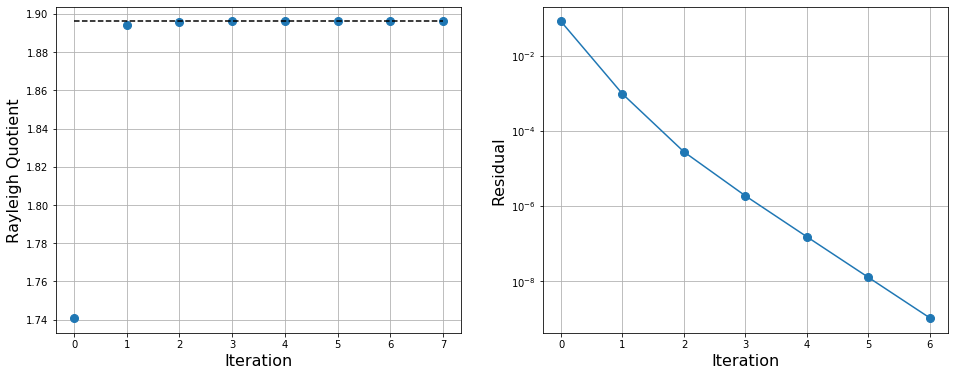

In [9]:
fig = plt.figure(figsize=(16, 6))
axes = fig.add_subplot(1,2,1)
axes.plot(r,'o',markersize=8)
lam_max = numpy.max(numpy.linalg.eigvals(A))
axes.plot(lam_max*numpy.ones(r.shape),'k--')

axes.grid()
axes.set_xlabel('Iteration', fontsize=16)
axes.set_ylabel('Rayleigh Quotient',fontsize=16)

axes = fig.add_subplot(1,2,2)
axes.semilogy(res,'o-',markersize=8)

axes.grid()
axes.set_xlabel('Iteration', fontsize=16)
axes.set_ylabel('Residual',fontsize=16)
plt.show()

The reason why this works can be seen by considering the initial vector $v$ as a linear combination of the orthonormal eigenvectors (which we have assumed exist) such that

$$
    v^{(0)} = a_1 q_1 + a_2 q_2 + \cdots + a_m q_m.
$$

Multiplying $v^{(0)}$ by $A$ then leads to

$$\begin{aligned}
    Av^{(0)} = v^{(1)} &= a_1 A q_1 + a_2 A q_2 + \cdots + a_m A q_m \\
    &= c_1 (a_1 \lambda_1 q_1 + a_2 \lambda_2 q_2 + \cdots + a_m \lambda_m q_m) \\
\end{aligned}$$

here $c_1$ is some constant due to the fact the eigenvectors are not uniquely specified.  

wRepeating this $k$ times we have

$$\begin{aligned}
    Av^{(k-1)} = v^{(k)} &= a_1 A^k q_1 + a_2 A^k q_2 + \cdots + a_m A^k q_m \\
    &= c_k (a_1 \lambda_1^k q_1 + a_2 \lambda_2^k q_2 + \cdots + a_m \lambda_m^k q_m) \\
    &= c_k \lambda_1^k \left(a_1 q_1 + a_2 \frac{\lambda_2^k}{\lambda_1^k} q_2 + \cdots + a_m \frac{\lambda_m^k}{\lambda_1^k} q_m \right)
\end{aligned}$$

Since $\lambda_1 > \lambda_i$ for all $i \neq 1$ then in the limit the terms $\lambda_2^k / \lambda_1^k$ will approach zero and on normalization $v^{(k)}/||v^{(k)}||\rightarrow \mathbf{q}_1$.

Note:
- This is originally how Google solved PageRank problem

### Inverse Iteration with shifts

Inverse iteration with shifts uses a similar approach with the difference being that we can use it to find any of the eigenvectors for the matrix $A$.  

**Some Preliminaries**:  inverse and shift rules of Eigenvalues

Show that if $\mathbf{x}$ is an eigenvector of $A$ with eigenvalue $\lambda$, then

* $\mathbf{x}$ is an eigenvector of $A^{-1}$ with eigenvalue $1/\lambda$
* $\mathbf{x}$ is an eigenvector of $A -\sigma I$ with eigenvalue $\lambda - \sigma$

So...

If we want to find the smallest eigenvalue we can consider the power method on $A^{-1}$,

But we really don't want to find $A^{-1}$ which is expensive,  instead we can  do the equivalent iteration

```python
x[0] = x0
for i in range(MAX_ITS):
    solve A w[i] = x[i]
        x[i+1] = w[i]/norm(w[i]) 
```

as $\mathbf{w}_i = A^{-1}\mathbf{x}_i$

and if we want to find the eigenvalue closest to some number $\mu$ we can apply the power method to 

$$
    (A - \mu I)^{-1},
$$ 

the eigenvectors of this matrix are 

$$
    (\lambda_j - \mu)^{-1}
$$ 

where $\lambda_j$ are the eigenvalues of $A$.  

If $\mu$ is close to a particular $\lambda_j$, say $\lambda_J$, then 

$$
    (\lambda_J - \mu)^{-1}
$$ 

will be larger than any of the other $(\lambda_j - \mu)^{-1}$.  In this way we effectively have picked out the eigenvalue we want to consider in the power iteration!

### Rayleigh Quotient Iteration

By themselves the above approaches are not particularly useful but combining them we can iterate back and forth to find the eigenvalue, eigenvector pair:
1. Compute the Rayleigh quotient and find an estimate for $\lambda_j$
1. Compute one step of inverse iteration to approximate $x_j$
1. Repeat...

In [10]:
def rayleigh_quotient_iteration(A, tol=1.e10):
    """ rayleigh quotient iteration to find eigenvalues
    parameters: 
    -----------
    
    A: ndarray (square)
        m x m matrix
        
    tol: float
        stopping criteria for iteration.  
        iteration will cease when ||x_{i+1} - x_{i}|| < tol or
        MAX_ITS exceeded
        
    returns:
    --------
    x: ndarray 
        array of iterates of the eigenvector
    r: ndarray
    """
    
    MAX_ITS = 100
    m = A.shape[0]
    
    x = numpy.empty((MAX_ITS,m))
    lam = numpy.empty(MAX_ITS)
    res = numpy.empty(MAX_ITS)
    
    I = numpy.eye(m)
    
    # generate a random unit vector
    x0 = numpy.random.rand(A.shape[0])
    x[0,:] = x0/numpy.linalg.norm(x0, ord=2)
    lam[0] = rayleighq(A, x0)
    
    for i in range(1,MAX_ITS+1):
        # this is the only different line
        w = numpy.linalg.solve(A - lam[i-1]*I, x[i-1,:])
        x[i,:] = w/numpy.linalg.norm(w, ord=2)
        lam[i] = rayleighq(A, x[i,:])
        res[i-1] = numpy.abs(lam[i] - lam[i-1])/numpy.abs(lam[i])
        if res[i-1] < tol:
            break
    if i == MAX_ITS:
        warnings.warn('Maximum iterations exceeded')
    
    x.resize(i+1,m)
    lam.resize(i+1)
    res.resize(i)
    return x, lam, res
    


In [11]:
x, r, res = rayleigh_quotient_iteration(A, tol=1.e-10)
print('{} Iterations'.format(len(r)))
print('x = {}'.format(x[-1]))
print('Rayleighquotient = {}'.format(r[-1]))
print('eigs(A) = {}'.format(numpy.linalg.eigvals(A)))

5 Iterations
x = [0.53203786 0.45983696 0.71097517]
Rayleighquotient = 1.8960581559610692
eigs(A) = [ 1.89605816 -0.5476958  -0.17266899]


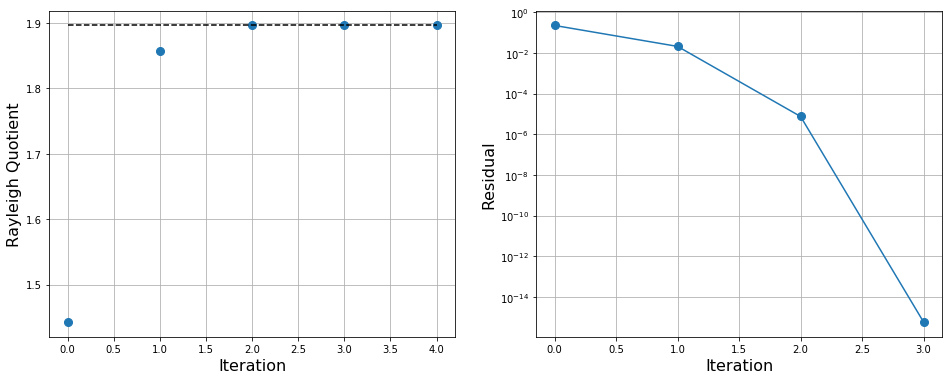

In [12]:
fig = plt.figure(figsize=(16, 6))
axes = fig.add_subplot(1,2,1)
axes.plot(r,'o',markersize=8)
lam_max = numpy.max(numpy.linalg.eigvals(A))
axes.plot(lam_max*numpy.ones(r.shape),'k--')

axes.grid()
axes.set_xlabel('Iteration', fontsize=16)
axes.set_ylabel('Rayleigh Quotient',fontsize=16)

axes = fig.add_subplot(1,2,2)
axes.semilogy(res,'o-',markersize=8)

axes.grid()
axes.set_xlabel('Iteration', fontsize=16)
axes.set_ylabel('Residual',fontsize=16)
plt.show()

Note:
- Still only picks one eigenvalue/vector

## QR/RQ Algorithm

All of the above methods pick out at most a few eigenvalues at a time.  However it turns out we can use the $QR$ algorithm, to **iterate towards the Schur factorization** and find all the eigenvalues simultaneously. 

The simplest algorithm just iterates 
```python
    while not converged:
        Q, R = numpy.linalg.qr(A)
        A = R.dot(Q)        
```
calculating the $QR$ factorization of $A$, then forming a new $A=RQ$,  This sequence will eventually converge to the Schur decomposition of the matrix $A$.

Code this up and see what happens.

Note:
- Generally start with Hessenberg of A?

In [13]:
%precision 6
m = 3
A = numpy.array([[2, 1, 1], [1, 3, 1], [1, 1, 4]])
MAX_STEPS = 10

for i in range(MAX_STEPS):
    Q, R = numpy.linalg.qr(A)
    A = numpy.dot(R, Q)
    print()
    print("A(%s) =" % (i))
    print(A)


A(0) =
[[ 4.166667e+00  1.095445e+00 -1.267105e+00]
 [ 1.095445e+00  2.000000e+00  3.187966e-17]
 [-1.267105e+00  2.153667e-16  2.833333e+00]]

A(1) =
[[ 5.090909  0.15743   0.623249]
 [ 0.15743   1.86182  -0.54704 ]
 [ 0.623249 -0.54704   2.047271]]

A(2) =
[[ 5.198682 -0.075903 -0.207275]
 [-0.075903  2.181835  0.496554]
 [-0.207275  0.496554  1.619484]]

A(3) =
[[ 5.211648 -0.065892  0.058223]
 [-0.065892  2.363696 -0.321368]
 [ 0.058223 -0.321368  1.424655]]

A(4) =
[[ 5.213778 -0.035826 -0.01528 ]
 [-0.035826  2.430805  0.183737]
 [-0.01528   0.183737  1.355417]]

A(5) =
[[ 5.214202e+00 -1.758371e-02  3.920120e-03]
 [-1.758371e-02  2.451920e+00 -1.007513e-01]
 [ 3.920120e-03 -1.007513e-01  1.333877e+00]]

A(6) =
[[ 5.214294e+00 -8.392060e-03 -9.988671e-04]
 [-8.392060e-03  2.458212e+00  5.453885e-02]
 [-9.988671e-04  5.453885e-02  1.327494e+00]]

A(7) =
[[ 5.214314e+00 -3.973357e-03  2.540044e-04]
 [-3.973357e-03  2.460055e+00 -2.940989e-02]
 [ 2.540044e-04 -2.940989e-02  1.32563

In [14]:
print()
print("True eigenvalues: ")
print(numpy.linalg.eigvals(A))
print()
print("Computed eigenvalues: ")
for i in range(m):
    print(A[i, i])


True eigenvalues: 
[5.21432  2.460811 1.324869]

Computed eigenvalues: 
5.214319458186374
2.4607473568633944
1.324933184950233


So why does this work?  The first step is to find the $QR$ factorization of $A^{(k-1)}$ which is equivalent to finding

$$
    (Q^{(k)})^T A^{(k-1)} = R^{(k)}
$$

and multiplying on the right leads to

$$
    (Q^{(k)})^T A^{(k-1)} Q^{(k)} = R^{(k)} Q^{(k)}.
$$

In this way we can see that this is a **similarity transformation** of the matrix $A^{(k-1)}$ since the $Q^{(k)}$ is an orthogonal matrix ($Q^{-1} = Q^T$). This of course is not a great idea to do directly but works great in this case as we iterate to find the upper triangular matrix $R^{(k)}$ which is exactly where the eigenvalues appear.

In practice this basic algorithm is modified to include a few additions:

1. Before starting the iteration $A$ is reduced to tridiagonal form.
1. Motivated by the inverse power iteration we observed we instead consider a shifted matrix $A^{(k)} - \mu^{(k)} I$ for factoring.  The $\mu$ picked is related to the estimate given by the Rayleigh quotient.  Here we have

$$
    \mu^{(k)} = \frac{(q_m^{(k)})^T A q_m^{(k)}}{(q_m^{(k)})^T q_m^{(k)}} = (q_m^{(k)})^T A q_m^{(k)}.
$$

1. Deflation is used to reduce the matrix $A^{(k)}$ into smaller matrices once (or when we are close to) finding an eigenvalue to simplify the problem.

This has been the standard approach until recently for finding eigenvalues of a matrix.

### Application:  Finding the roots of a polynomial

Numpy has a nice function called roots which returns the $n$ roots of a $n$th degree polynomial

$$
   p(x) = c_0 + c_1 x + c_2 x^2 + \ldots + c_n x^n
$$

described by a $n+1$ vector of coefficients $\mathbf{c}$

In [ ]:
c = numpy.array([ -1, -1, 1])
r = numpy.roots(c)
print(r)

In [22]:
c = numpy.random.rand(6)
r = numpy.roots(c)
print(r)

[-0.297883+1.073963j -0.297883-1.073963j  0.478944+0.646082j
  0.478944-0.646082j -0.625421+0.j      ]


This routine, does not try and actually find the roots of a high-order polynomial,  instead it actually calculates the eigenvalues of a **companion matrix** $C$ whose characteristic polynomial $P_C(\lambda)$ is the **monic** polynomial $p_m(x) = p(x)/c_n$.

It can be shown that this matrix can be constructed as ([see e.g.](https://en.wikipedia.org/wiki/Companion_matrix))
$$
C(p)=\begin{bmatrix}
0 & 0 & \dots & 0 & -c_0 \\
1 & 0 & \dots & 0 & -c_1 \\
0 & 1 & \dots & 0 & -c_2 \\
\vdots & \vdots & \ddots & \vdots & \vdots \\
0 & 0 & \dots & 1 & -c_{n-1}
\end{bmatrix}.
$$



In [37]:
def myroots(p, verbose=True):
    ''' Calculate the roots of a polynomial described by coefficient vector 
    p(x) = p_0 + p_1 x + p_2 x^2 + \ldots + p_n x^n    
    by finding the eigenvalues of the companion matrix
    '''
    
    # construct the companion matrix of the coefficient vector c
    # make p monic and drop the last coefficient
    c = p/p[-1]
    if verbose:
        print(c)
    m = len(c) - 1
    C = numpy.zeros((m,m))
    C[:,-1] = -c[:-1]
    C[1:,:-1] = numpy.eye(m-1)
    if verbose:
        print('C = \n{}'.format(C))
        
    return numpy.linalg.eigvals(C)



In [29]:
c = numpy.array([ -1, -1, 1])
r = numpy.roots(c)
print(r)
mr = myroots(c) 
print
print(mr)

[-1.618034  0.618034]
[-1. -1.  1.]
C = 
[[0. 1.]
 [1. 1.]]
[-0.618034  1.618034]


In [33]:
c = numpy.random.rand(5)
r = numpy.roots(c)
print(r)
mr = myroots(c) 
print
print(mr)

[-0.645124+0.938142j -0.645124-0.938142j  0.387499+1.025941j
  0.387499-1.025941j]
[0.641409 0.330487 0.961515 0.350958 1.      ]
C = 
[[ 0.        0.        0.       -0.641409]
 [ 1.        0.        0.       -0.330487]
 [ 0.        1.        0.       -0.961515]
 [ 0.        0.        1.       -0.350958]]
[ 0.322188+0.853024j  0.322188-0.853024j -0.497667+0.72371j
 -0.497667-0.72371j ]


## Alternatives

### Jacobi

Jacobi iteration employs the idea that we know the eigenvalues of a matrix of size equal to or less than 4 (we know the roots of the characteristic polynomial directly).  Jacobi iteration therefore attempts to break the matrix down into at most 4 by 4 matrices along the diagonal via a series of similarity transformations based on only diagonalizing sub-matrices 4 by 4 or smaller.

### Bisection 

It turns out if you do not want all of the eigenvalues of a matrix that using a bisection method to find some subset of the eigenvalues is often the most efficient way to get these.  This avoids the pitfall of trying to find the eigenvalues via other root-finding approaches by only needing evaluations of the function and if a suitable initial guess is provided can find the eigenvalue quickly that is closest to the initial bracket provided.

### Divide-and-conquer

This algorithm is actually the one used most often used if both eigenvalues and eigenvectors are needed and performs up to twice as fast as the $QR$ approach.  The basic idea is to split the matrix into two pieces at every iteration by introducing zeros on the appropriate off-diagonals which neatly divides the problem into two pieces.

### Arnoldi and Lanczos Iteration

Krylov subspace methods (which we will unfortunately not cover) are another approach to finding eigenvalues of a matrix.  These methods generally use some piece of the $QR$ approach outlined above and are extremely effective at finding the "extreme" eigenvalues of the matrix.